# **Bike Sharing Demand Prediction**

## Introduction

Rental bikes have been introduced in numerous urban cities to improve mobility convenience. Ensuring the availability and accessibility of rental bikes to the public at the appropriate times is crucial in reducing waiting times. Consequently, maintaining a stable supply of rental bikes becomes a significant challenge. A key aspect of addressing this challenge is accurately predicting the required bike count for each hour, enabling the city to maintain a consistent supply of rental bikes. The dataset available for analysis includes weather information (such as temperature, humidity, windspeed, visibility, dewpoint, solar radiation, snowfall, and rainfall), the number of bikes rented per hour, and date information. By leveraging this dataset, accurate predictions can be made to optimize the distribution and availability of rental bikes throughout the day.

## Dataset Information

- **Date :** year-month-day
- **Rented Bike count :** Count of bikes rented at each hour
- **Hour :** Hour of he day
- **Temperature :** Temperature in Celsius
- **Humidity :** %
- **Windspeed :** m/s
- **Visibility :** 10m
- **Dew point temperature :** Celsius
- **Solar radiation :** MJ/m2
- **Rainfall :** mm
- **Snowfall :** cm
- **Seasons :** Winter, Spring, Summer, Autumn
- **Holiday :** Holiday/No holiday
- **Functional Day :** NoFunc(Non Functional Hours), Fun(Functional hours)

### **Importing Libraries**

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

### Data Manipulation

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [44]:
df.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [45]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-45-b9c6864122be>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [46]:
df['Day Name'] = df['Date'].dt.day_name()
df['Day Number'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()

In [47]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Day Name  Day Number    Month  
0             Yes  Thursday          12  January  
1             Yes  Thursday          12  January  
2             Yes  Thursday          12  January  
3             Yes  Thursday          12  January  
4             Yes  Thursday          12  January

In [48]:
df.drop(columns=['Date'],inplace=True)

In [49]:
df.head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  Day Name  \
0           0.0            0.0  Winter  No Holiday             Yes  Thursday   
1           0.0            0.0  Winter  No Holiday             Yes  Thursday   
2           0.0            0.0  Winter  No Holiday             Yes  Thursday   
3           0.0            0.0  Winter  No Holiday             Yes  Thursday   
4           0.0            0.0  Winter  No Holiday             Yes  Thursday   

   Day Number    Month  
0          12  January  
1          12  January  
2          12  January  
3          12  January  
4          12  January

## EDA

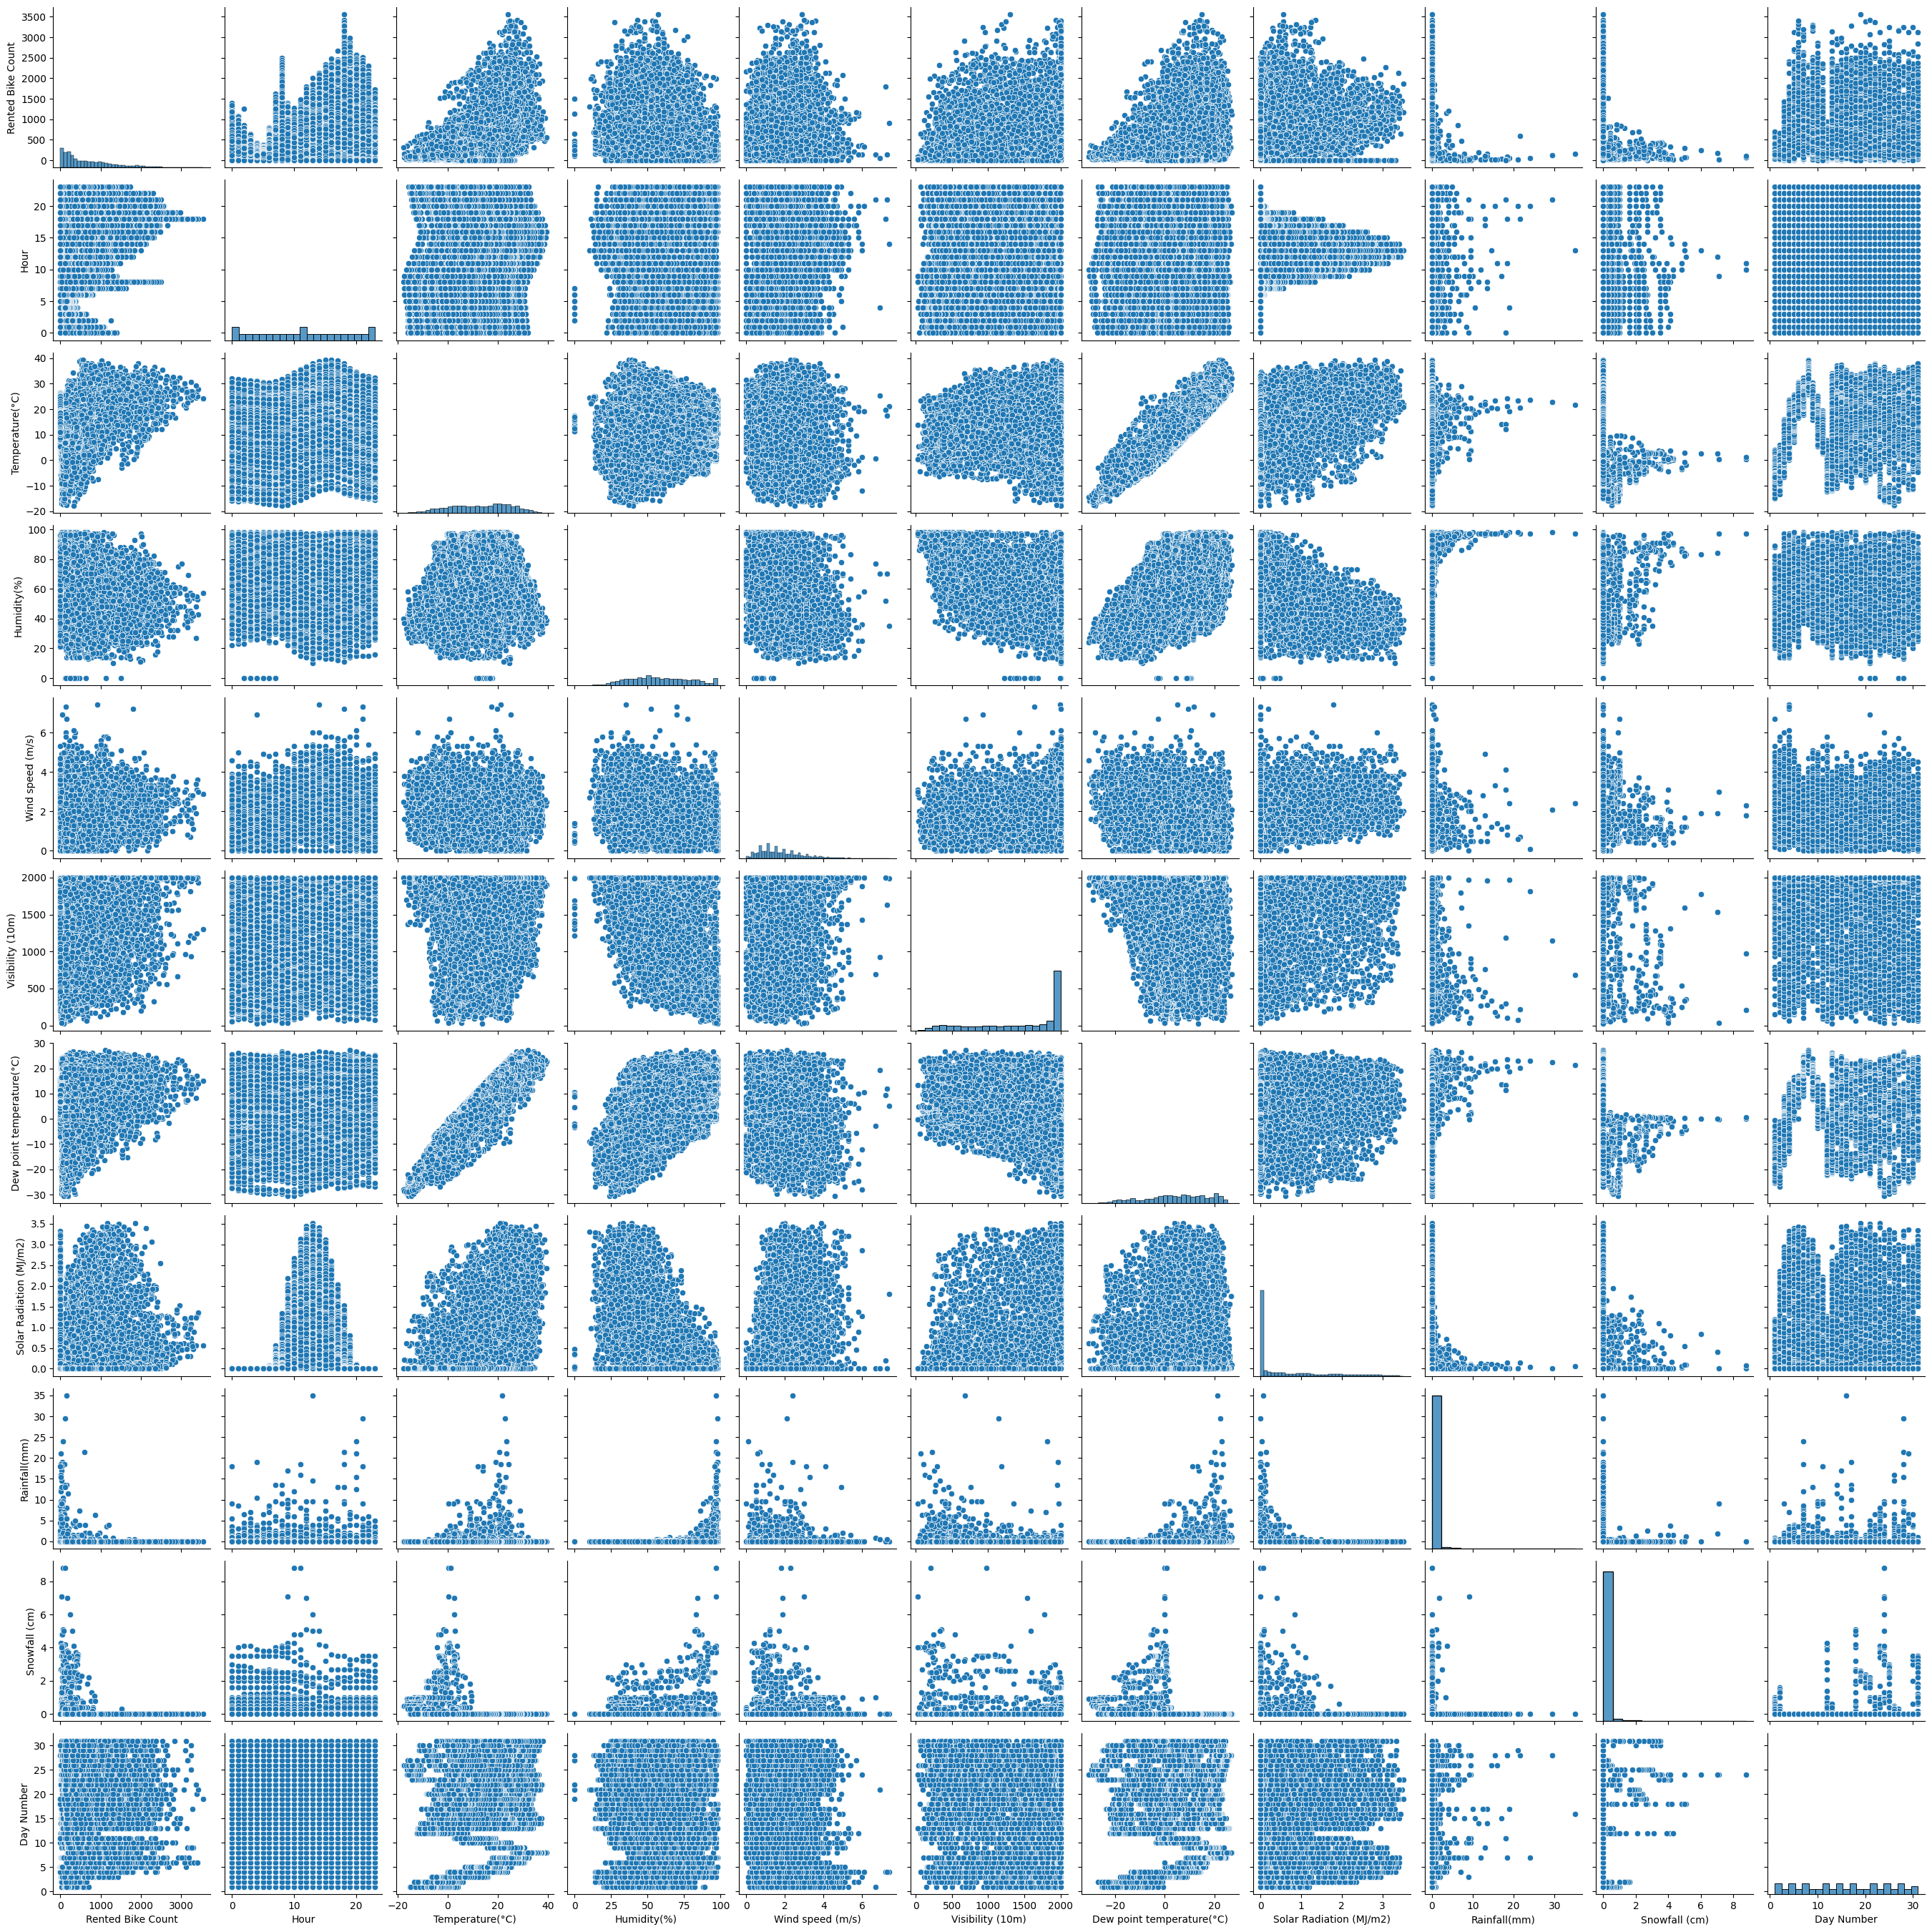

In [50]:
sns.pairplot(df)

- The demand is very low on 1st, 2nd and 12th day. We can service the bikes on those days
- Rainfall and Snowfall are highly corelated with demand and with each other
- When temprature is low the demand is low as well.
- We can also see the demand with the respect to time of day, in the hours when demand is high we can raise prices and vice-versa.

<Axes: xlabel='Month', ylabel='Rented Bike Count'>

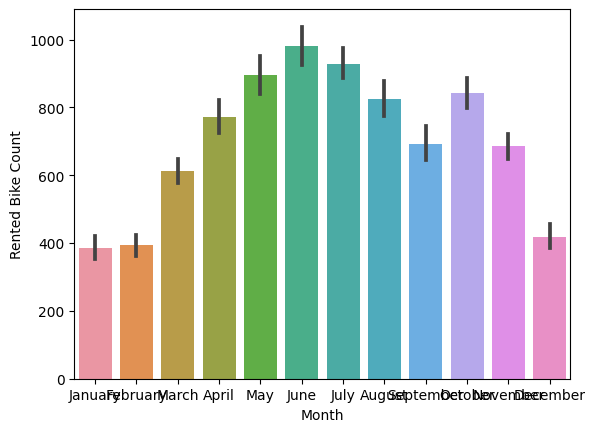

In [51]:
sns.barplot(data=df,x='Month',y='Rented Bike Count')

<Axes: xlabel='Day Number', ylabel='Rented Bike Count'>

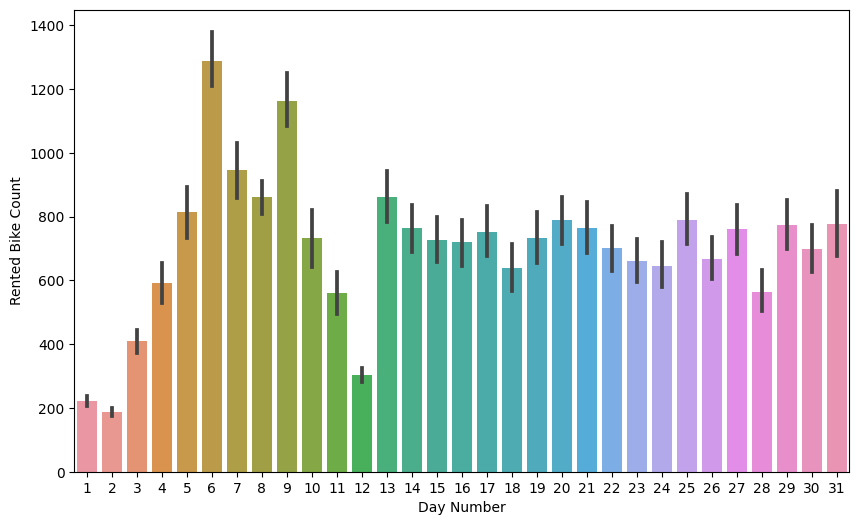

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Day Number',y='Rented Bike Count')

<Axes: xlabel='Hour', ylabel='Rented Bike Count'>

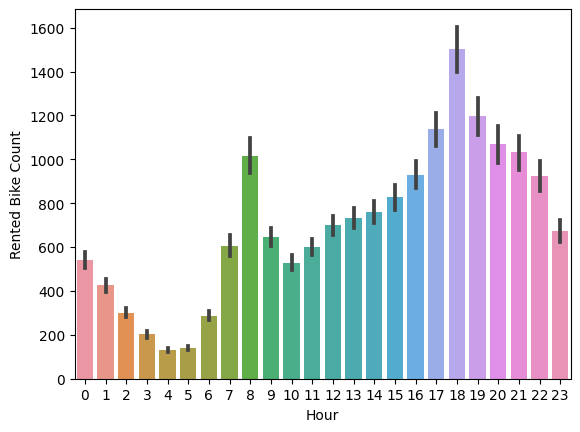

In [53]:
sns.barplot(data=df,x='Hour',y='Rented Bike Count')

- Demand is high at 8 and 18 hour, it maybe office hours.

<Axes: xlabel='Holiday', ylabel='Rented Bike Count'>

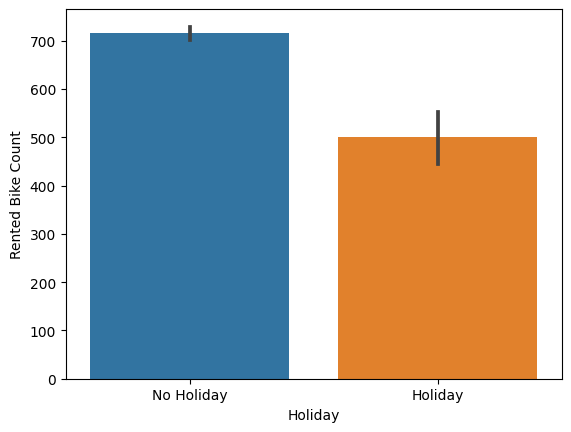

In [54]:
sns.barplot(data=df,x='Holiday',y='Rented Bike Count')

<Axes: xlabel='Seasons', ylabel='Rented Bike Count'>

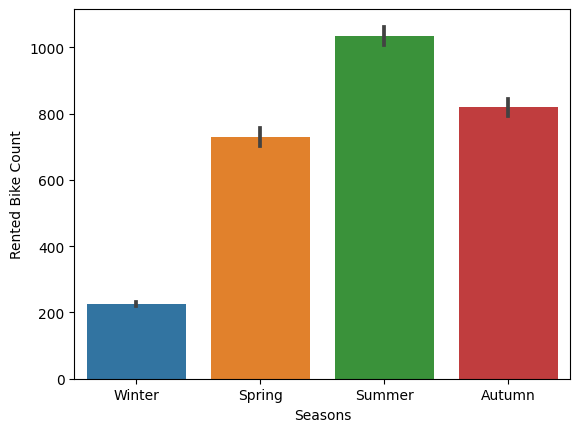

In [55]:
sns.barplot(data=df,x='Seasons',y='Rented Bike Count')

<Axes: xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

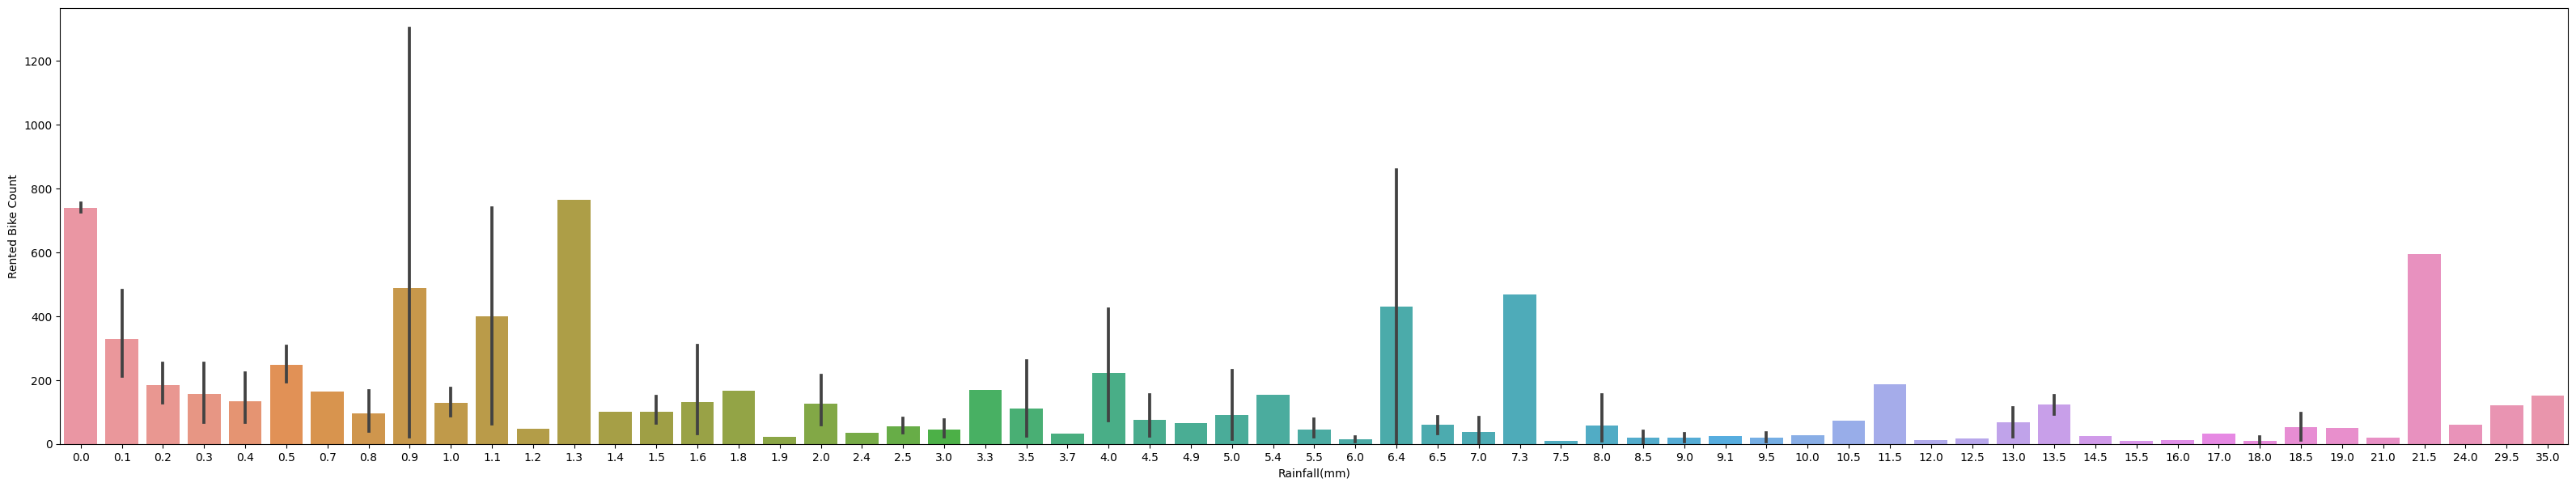

In [56]:
plt.figure(figsize=(40,7))
sns.barplot(data=df,x='Rainfall(mm)',y='Rented Bike Count')

<Axes: xlabel='Snowfall (cm)', ylabel='Rented Bike Count'>

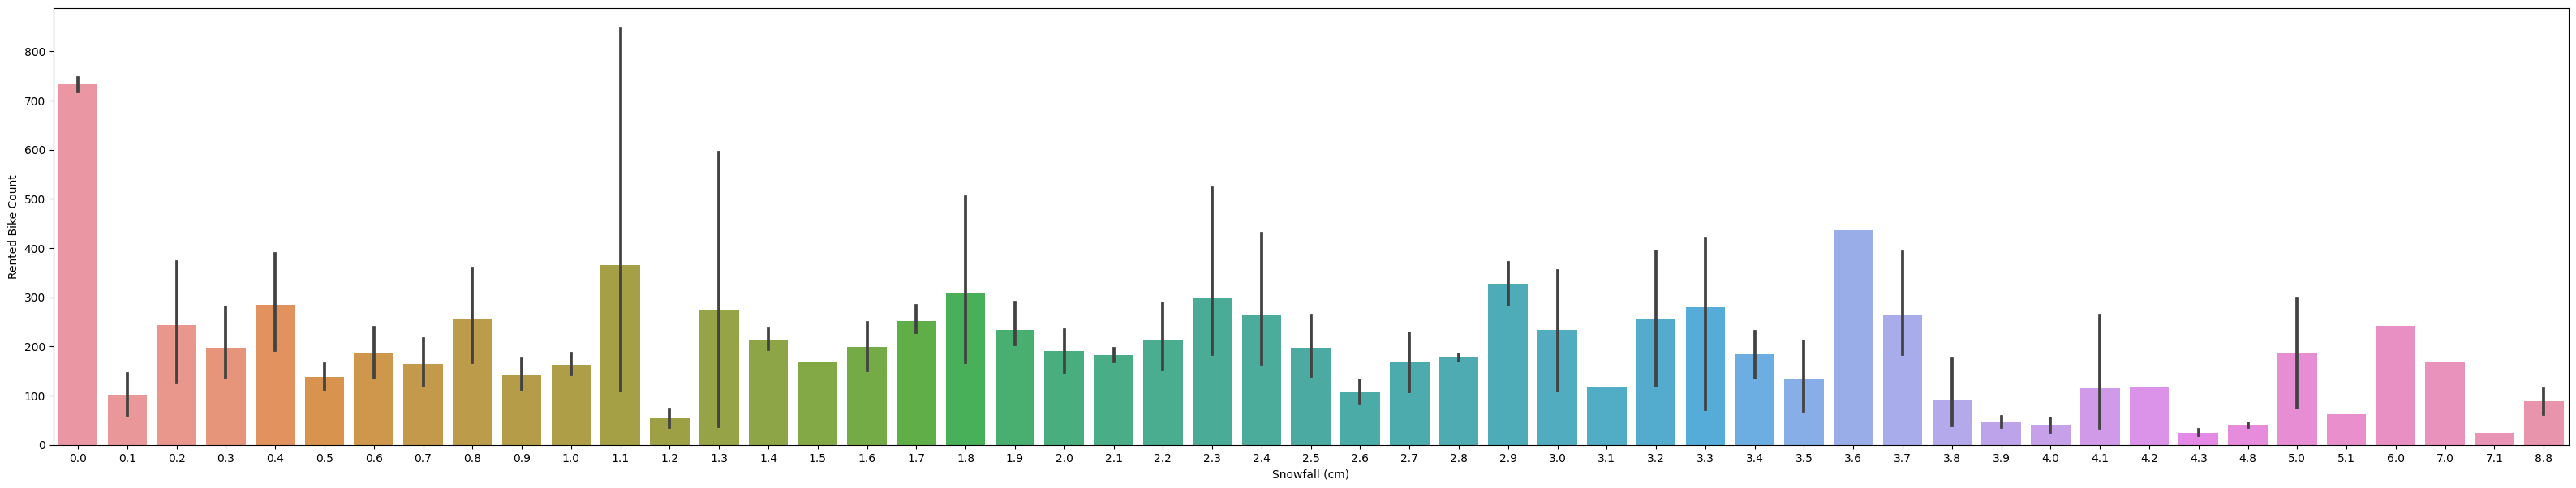

In [57]:
plt.figure(figsize=(40,7))
sns.barplot(data=df,x='Snowfall (cm)',y='Rented Bike Count')

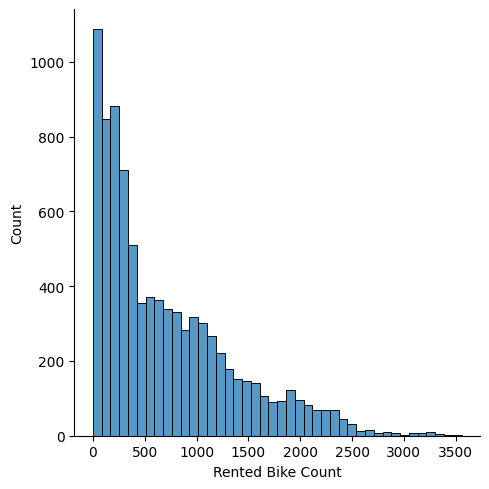

In [58]:
sns.displot(df,x='Rented Bike Count')

### Skewness

In [59]:
df.skew().sort_values(ascending=True)

<ipython-input-59-8df2e83014aa>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew().sort_values(ascending=True)


Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Hour                          0.000000
Day Number                    0.007522
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

### Correlation

<ipython-input-60-e4d37e0a5953>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: >

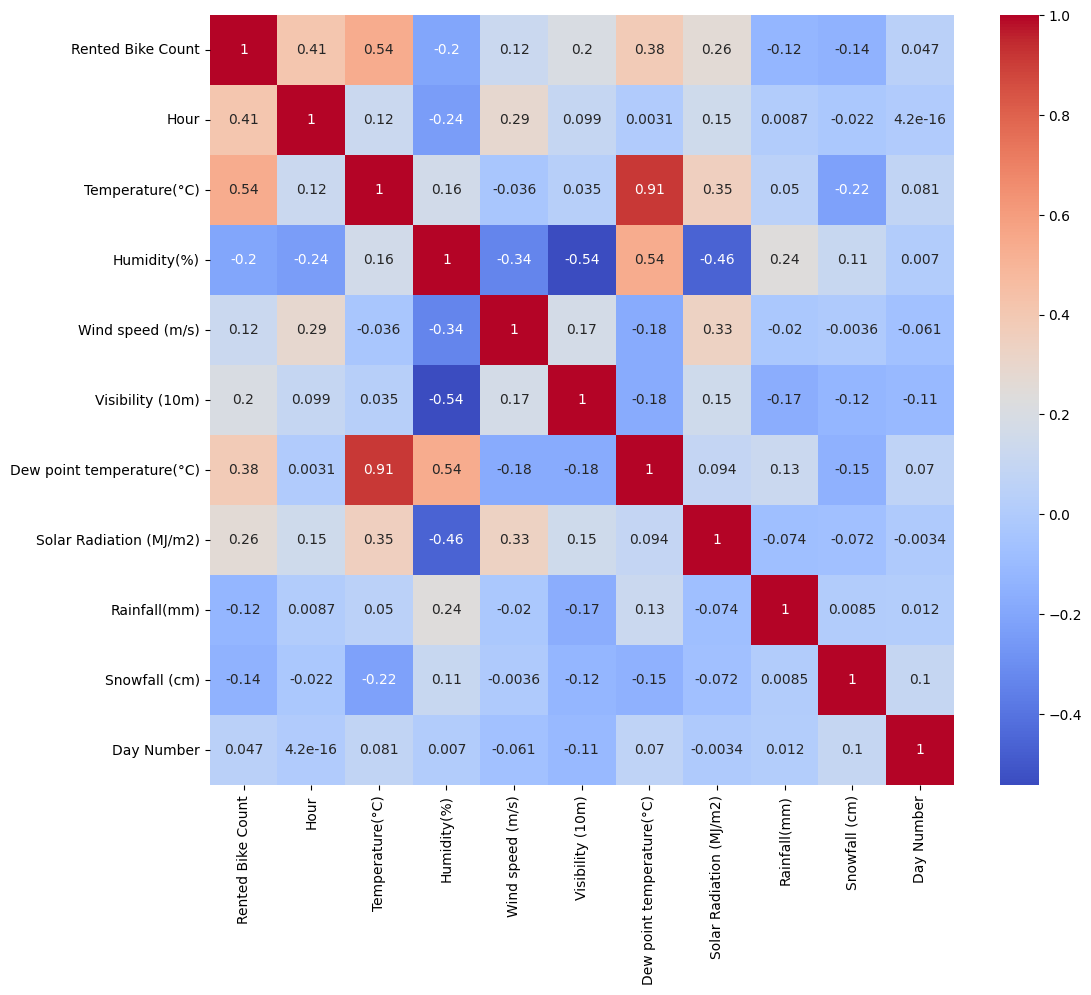

In [60]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

- Dew point temperature and temperature are highly correlated. One of them can be removed
- Dew point temperature and humity is highly correlated

In [61]:
# Select the relevant columns for calculating VIF
selected_columns = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Snowfall (cm)', 'Rainfall(mm)']

# Create a DataFrame containing only the selected columns
data_selected = df[selected_columns]

# Calculate VIF for each column
vif = pd.DataFrame()
vif["Feature"] = data_selected.columns
vif["VIF"] = [variance_inflation_factor(data_selected.values, i) for i in range(data_selected.shape[1])]

# Print the VIF values
print(vif)


                     Feature        VIF
0            Temperature(°C)  29.075866
1                Humidity(%)   5.069743
2           Wind speed (m/s)   4.517664
3           Visibility (10m)   9.051931
4  Dew point temperature(°C)  15.201989
5    Solar Radiation (MJ/m2)   2.821604
6              Snowfall (cm)   1.118903
7               Rainfall(mm)   1.079919


In [62]:
# Select the relevant columns for calculating VIF
selected_columns = ['Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Snowfall (cm)', 'Rainfall(mm)']

# Create a DataFrame containing only the selected columns
data_selected = df[selected_columns]

# Calculate VIF for each column
vif = pd.DataFrame()
vif["Feature"] = data_selected.columns
vif["VIF"] = [variance_inflation_factor(data_selected.values, i) for i in range(data_selected.shape[1])]

# Print the VIF values
print(vif)


                     Feature       VIF
0                Humidity(%)  5.049297
1           Wind speed (m/s)  4.265415
2           Visibility (10m)  4.623490
3  Dew point temperature(°C)  1.655311
4    Solar Radiation (MJ/m2)  1.901297
5              Snowfall (cm)  1.111247
6               Rainfall(mm)  1.079157


In [63]:
# Select the relevant columns for calculating VIF
selected_columns = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Snowfall (cm)', 'Rainfall(mm)']

# Create a DataFrame containing only the selected columns
data_selected = df[selected_columns]

# Calculate VIF for each column
vif = pd.DataFrame()
vif["Feature"] = data_selected.columns
vif["VIF"] = [variance_inflation_factor(data_selected.values, i) for i in range(data_selected.shape[1])]

# Print the VIF values
print(vif)


                   Feature       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5            Snowfall (cm)  1.118901
6             Rainfall(mm)  1.078501


- Since dropping Dew point temperature gives the better results, we'll remove that.

In [64]:
df.drop(columns=['Dew point temperature(°C)'],inplace=True)

## Encoding

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Day Name                 8760 non-null   object 
 13  Day Number               8760 non-null   int64  
 14  Month                   

In [80]:
df['Day Number'] =pd.Categorical(df['Day Number'])

In [81]:
cat_features = ['Seasons', 'Holiday', 'Functioning Day', 'Day Name', 'Day Number', 'Month']

In [68]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [69]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [70]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [71]:
df['Day Name'].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: Day Name, dtype: int64

In [82]:
ohe = pd.get_dummies(df[cat_features],drop_first=True)

In [84]:
ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Seasons_Spring       8760 non-null   uint8
 1   Seasons_Summer       8760 non-null   uint8
 2   Seasons_Winter       8760 non-null   uint8
 3   Holiday_No Holiday   8760 non-null   uint8
 4   Functioning Day_Yes  8760 non-null   uint8
 5   Day Name_Monday      8760 non-null   uint8
 6   Day Name_Saturday    8760 non-null   uint8
 7   Day Name_Sunday      8760 non-null   uint8
 8   Day Name_Thursday    8760 non-null   uint8
 9   Day Name_Tuesday     8760 non-null   uint8
 10  Day Name_Wednesday   8760 non-null   uint8
 11  Day Number_2         8760 non-null   uint8
 12  Day Number_3         8760 non-null   uint8
 13  Day Number_4         8760 non-null   uint8
 14  Day Number_5         8760 non-null   uint8
 15  Day Number_6         8760 non-null   uint8
 16  Day Number_7         876

In [85]:
df = pd.concat([df.drop(cat_features,axis=1),ohe], axis=1)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons_Spring           8760 non-null   uint8  
 10  Seasons_Summer           8760 non-null   uint8  
 11  Seasons_Winter           8760 non-null   uint8  
 12  Holiday_No Holiday       8760 non-null   uint8  
 13  Functioning Day_Yes      8760 non-null   uint8  
 14  Day Name_Monday         

In [87]:
df.shape

(8760, 61)

## Data Split for Training and Testing

In [88]:
X = df.drop('Rented Bike Count', axis=1)
y = df['Rented Bike Count']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=18)

print('Shape of X_train',X_train.shape)
print('Shape of y_train',y_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of y_test',y_test.shape)

Shape of X_train (7008, 60)
Shape of y_train (7008,)
Shape of X_test (1752, 60)
Shape of y_test (1752,)


In [90]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [91]:
X_train

array([[ 0.65450556, -0.04504894, -1.38227368, ..., -0.30235539,
        -0.30710919, -0.29726715],
       [-0.35560659,  0.29179972,  1.32114105, ..., -0.30235539,
        -0.30710919, -0.29726715],
       [ 0.94310902, -1.37560115, -1.13650871, ..., -0.30235539,
        -0.30710919, -0.29726715],
       ...,
       [ 0.36590209,  0.62022716,  1.51775303, ..., -0.30235539,
        -0.30710919,  3.36397748],
       [ 1.52031596, -1.602974  , -1.28396769, ..., -0.30235539,
         3.25617091, -0.29726715],
       [-0.93281352, -0.25557936,  0.73130511, ..., -0.30235539,
        -0.30710919, -0.29726715]])

In [92]:
sc.mean_

array([1.14643265e+01, 1.28349458e+01, 5.81218607e+01, 1.72234589e+00,
       1.43622175e+03, 5.70567922e-01, 1.50556507e-01, 7.44434932e-02,
       2.52140411e-01, 2.47574201e-01, 2.46860731e-01, 9.49771689e-01,
       9.65896119e-01, 1.36272831e-01, 1.43692922e-01, 1.48972603e-01,
       1.41695205e-01, 1.44977169e-01, 1.45976027e-01, 3.18207763e-02,
       3.36757991e-02, 3.26769406e-02, 3.33904110e-02, 3.29623288e-02,
       3.19634703e-02, 3.01084475e-02, 3.45319635e-02, 3.31050228e-02,
       3.43892694e-02, 3.25342466e-02, 3.25342466e-02, 3.33904110e-02,
       3.12500000e-02, 3.32477169e-02, 3.42465753e-02, 3.06792237e-02,
       3.19634703e-02, 3.31050228e-02, 3.35331050e-02, 3.29623288e-02,
       3.26769406e-02, 3.16780822e-02, 3.29623288e-02, 3.28196347e-02,
       3.16780822e-02, 3.46746575e-02, 2.91095890e-02, 3.23915525e-02,
       1.96917808e-02, 8.43321918e-02, 8.64726027e-02, 7.79109589e-02,
       8.43321918e-02, 8.43321918e-02, 8.19063927e-02, 8.63299087e-02,
      

In [93]:
sc.scale_

array([6.92992363e+00, 1.18747689e+01, 2.03446402e+01, 1.03798578e+00,
       6.08611260e+02, 8.68978296e-01, 1.18445252e+00, 4.31694659e-01,
       4.34241435e-01, 4.31603077e-01, 4.31185007e-01, 2.18415721e-01,
       1.81496024e-01, 3.43078047e-01, 3.50778087e-01, 3.56061464e-01,
       3.48737257e-01, 3.52077817e-01, 3.53082181e-01, 1.75522689e-01,
       1.80393292e-01, 1.77789646e-01, 1.79653810e-01, 1.78537989e-01,
       1.75902834e-01, 1.70885719e-01, 1.82591092e-01, 1.78910817e-01,
       1.82226912e-01, 1.77414118e-01, 1.77414118e-01, 1.79653810e-01,
       1.73992636e-01, 1.79282755e-01, 1.81861891e-01, 1.72447119e-01,
       1.75902834e-01, 1.78910817e-01, 1.80023987e-01, 1.78537989e-01,
       1.77789646e-01, 1.75141604e-01, 1.78537989e-01, 1.78164268e-01,
       1.75141604e-01, 1.82954436e-01, 1.68113714e-01, 1.77037679e-01,
       1.38938888e-01, 2.77885360e-01, 2.81060655e-01, 2.68031419e-01,
       2.77885360e-01, 2.77885360e-01, 2.74222055e-01, 2.80850593e-01,
      

# Training Machine Learning Model

## Linear Regression

In [94]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [95]:
y_pred = lr.predict(X_test)

# Model Evaluation

In [96]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test,y_pred)

print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'MAE: {MAE}')
print(f'R2: {R2}')

MSE: 178615.00179128355
RMSE: 422.6286807485781
MAE: 318.7682884734033
R2: 0.5871771084411188


In [97]:
def evaluate(y_true,y_pred,model):
    MSE = mean_squared_error(y_true,y_pred)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(y_true, y_pred)
    R2 = r2_score(y_true,y_pred)

    print('*'*20)
    print(f'{model}:')
    print('*'*20)
    print(f'MSE: {round(MSE,3)}')
    print(f'RMSE: {round(RMSE,3)}')
    print(f'MAE: {round(MAE,3)}')
    print(f'R2: {round(R2,3)}')

    plt.figure(figsize=(4,3))
    plt.scatter(y_true,y_pred)
    plt.xlabel('Ground Truth')
    plt.ylabel('Prediction')
    plt.title(f'{model} Truth vs Prediction')
    plt.show()


********************
LinearRegression:
********************
MSE: 178615.002
RMSE: 422.629
MAE: 318.768
R2: 0.587


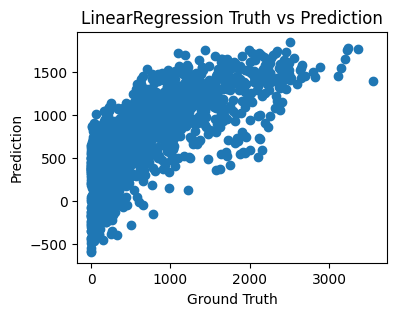

In [98]:
evaluate(y_test,y_pred,'LinearRegression')

## Multiple Models

In [99]:
rir = Ridge().fit(X_train,y_train)
y_pred_rir = rir.predict(X_test)

lar = Lasso().fit(X_train,y_train)
y_pred_lar = lar.predict(X_test)

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

poly_r = LinearRegression().fit(X_train_poly,y_train)
y_pred_poly = poly_r.predict(X_test_poly)

svr = SVR().fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)

knr = KNeighborsRegressor().fit(X_train,y_train)
y_pred_knr = knr.predict(X_test)

dtr = DecisionTreeRegressor().fit(X_train,y_train)
y_pred_dtr = dtr.predict(X_test)

rfr = RandomForestRegressor().fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)

xgbr = XGBRegressor().fit(X_train,y_train)
y_pred_xgbr = xgbr.predict(X_test)

********************
Ridge:
********************
MSE: 178614.955
RMSE: 422.629
MAE: 318.767
R2: 0.587


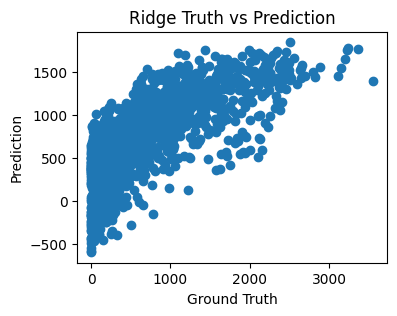

********************
Lasso:
********************
MSE: 178776.251
RMSE: 422.819
MAE: 318.614
R2: 0.587


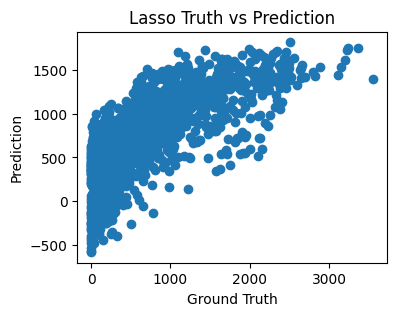

********************
PolynomialRegression:
********************
MSE: 8.4473020640716e+22
RMSE: 290642427461.505
MAE: 8420492949.957
R2: -1.9523778120475434e+17


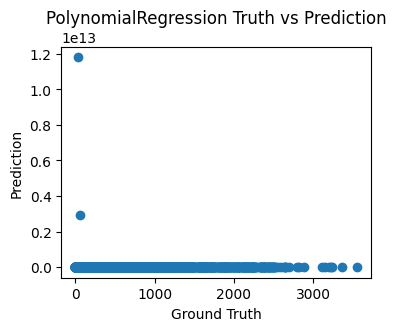

********************
SVR:
********************
MSE: 417973.423
RMSE: 646.509
MAE: 458.812
R2: 0.034


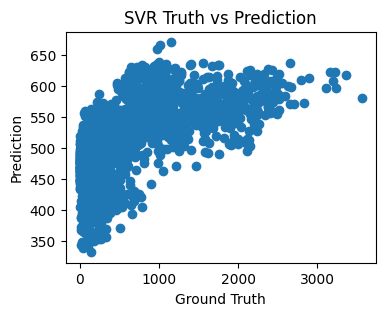

********************
KNeighborsRegressor:
********************
MSE: 127666.71
RMSE: 357.305
MAE: 231.252
R2: 0.705


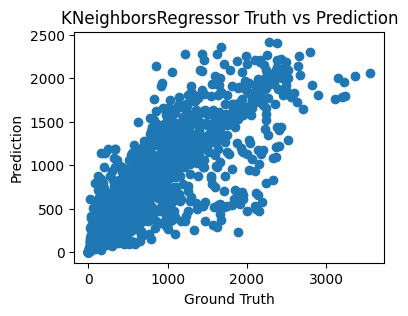

********************
DecisionTreeRegressor:
********************
MSE: 68976.808
RMSE: 262.634
MAE: 150.386
R2: 0.841


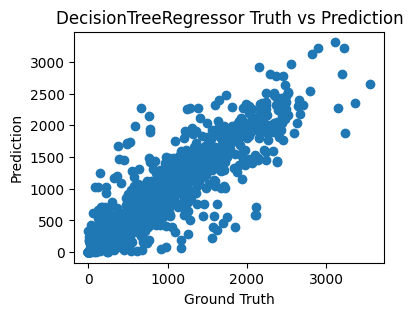

********************
RandomForestRegressor:
********************
MSE: 41177.157
RMSE: 202.922
MAE: 121.511
R2: 0.905


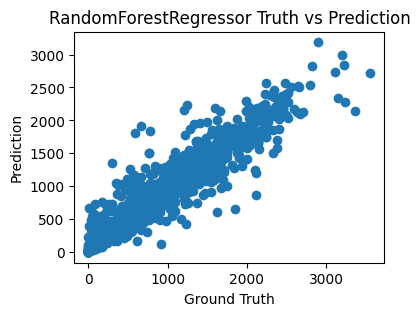

********************
XGBRegressor:
********************
MSE: 34262.221
RMSE: 185.101
MAE: 116.216
R2: 0.921


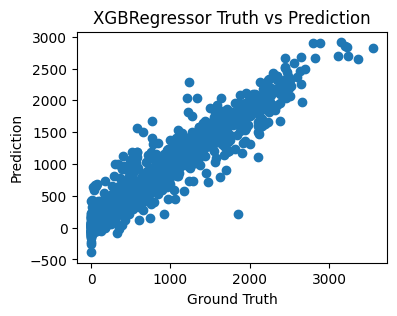

In [100]:
evaluate(y_test,y_pred_rir,'Ridge')
evaluate(y_test,y_pred_lar,'Lasso')
evaluate(y_test,y_pred_poly,'PolynomialRegression')
evaluate(y_test,y_pred_svr,'SVR')
evaluate(y_test,y_pred_knr,'KNeighborsRegressor')
evaluate(y_test,y_pred_dtr,'DecisionTreeRegressor')
evaluate(y_test,y_pred_rfr,'RandomForestRegressor')
evaluate(y_test,y_pred_xgbr,'XGBRegressor')

## RandomForestRegressor Hyperparameter Tuning

In [101]:
import time
start = time.time()
rf_params = {
    'n_estimators': np.linspace(200, 2000, num=10, dtype=int),
    'max_depth': np.linspace(10, 120, num=12, dtype=int),
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4] ,
    'max_features': [1.0, 'sqrt'],
    'bootstrap' : [True,False]
}
rf_regressor = RandomForestRegressor()

rf_random_search = RandomizedSearchCV(rf_regressor, rf_params, n_iter=100, verbose=2, cv=3, random_state=42)
rf_random_search.fit(X_train,y_train)
y_pred_rf_random = rf_random_search.predict(X_test)

print(f'Time taken for training: ',time.time()-start)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.3s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   3.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=400; total time=   2.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   9.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   9.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=2000; total time=   9.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1200;

In [103]:
rf_random_search.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 1.0,
 'max_depth': 100,
 'bootstrap': True}

********************
Tuned RandomForestRegressor:
********************
MSE: 40503.315
RMSE: 201.254
MAE: 127.233
R2: 0.906


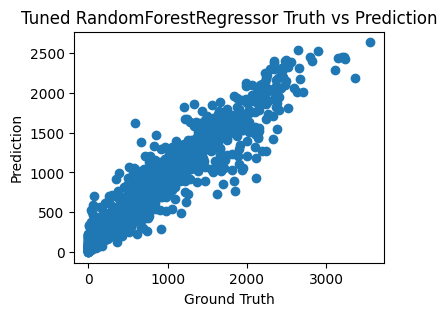

In [104]:
rf_tuned = RandomForestRegressor(n_estimators= 1800,
                                 min_samples_split= 2,
                                 min_samples_leaf= 1,
                                 max_features= 'sqrt',
                                 max_depth= 90,
                                 bootstrap= False)
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

evaluate(y_test,y_pred_rf_tuned, 'Tuned RandomForestRegressor')

## XGBRegressor Hyperparameter Tuning

In [102]:
import time
start = time.time()
xgb_params = {
    'n_estimators': np.linspace(100,1000,num=3,dtype=int),
    'max_depth': np.linspace(3, 20, num=6, dtype=int),
    'learning_rate': [0.01,0.1,0.2,0.3],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.4,1.0,0.1),
    'colsample_bylevel': np.arange(0.4,1.0,0.1),

}

xgb_regressor = XGBRegressor()

xgb_random_search = RandomizedSearchCV(xgb_regressor, xgb_params, n_iter=25, scoring='neg_mean_squared_error', cv=5, verbose=2,random_state=18)
xgb_random_search.fit(X_train, y_train)

print('Time taken: ', time.time()-start)

# Get the best parameters and model
xgb_best_params = xgb_random_search.best_params_
xgb_best_model = xgb_random_search.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=1000, subsample=0.7; total time=  20.4s
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=1000, subsample=0.7; total time=  20.4s
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=1000, subsample=0.7; total time=  18.6s
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=1000, subsample=0.7; total time=  22.1s
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.6, learning_rate=0.01, max_depth=9, n_estimators=1000, subsample=0.7; total time=  20.4s
[CV] END colsample_bylevel=0.8999999999999999, colsample_bytree=0.7999999999999999, learning_rate=0.3, max_depth=13, n_estimators=550, subsample=0.7999999999999999

In [105]:
xgb_best_params

{'subsample': 0.8999999999999999,
 'n_estimators': 100,
 'max_depth': 9,
 'learning_rate': 0.1,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.5}

In [106]:
y_pred_xgb_tuned = xgb_best_model.predict(X_test)

********************
Tuned XGBRegressor:
********************
MSE: 29531.887
RMSE: 171.848
MAE: 103.353
R2: 0.932


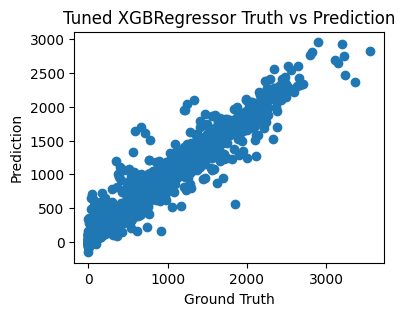

In [107]:
evaluate(y_test,y_pred_xgb_tuned,'Tuned XGBRegressor')

## Saving the best Model

In [108]:
import pickle

model_file_name = 'xgb_regressor_r2_0_932_v2.pkl'

pickle.dump(xgb_best_model,open(model_file_name,'wb'))

In [109]:
X_test[0,:]

array([ 0.94310902,  0.94865461, -0.05514281,  1.13455708, -0.22218082,
       -0.01216132, -0.12711063, -0.17244479, -0.58064567,  1.74332816,
       -0.57251696,  0.22996655,  0.18790429, -0.3972065 , -0.40964053,
       -0.41839013, -0.40630934,  2.42850526, -0.41343357, -0.18129153,
       -0.18667989, -0.18379552, -0.18585974, -0.18462361, -0.18171095,
       -0.17619054, -0.18912184, -0.18503645, -0.18871674, -0.18338026,
       -0.18338026, -0.18585974, -0.1796053 , -0.18544849, -0.18831089,
       -0.17790511,  5.5032458 , -0.18503645, -0.18627021, -0.18462361,
       -0.18379552, -0.18087126, -0.18462361, -0.18420997, -0.18087126,
       -0.18952619, -0.17315416, -0.18296417, -0.1417298 , -0.30347835,
       -0.30766527, -0.29067846, -0.30347835, -0.30347835,  3.34799331,
       -0.30738731, -0.30122965, -0.30235539, -0.30710919, -0.29726715])

In [110]:
X_test[2,:]

array([-0.06700312, -0.65137653,  1.41944704, -0.31054943, -1.83240407,
       -0.3689021 , -0.12711063, -0.17244479, -0.58064567, -0.57361547,
        1.74667314,  0.22996655,  0.18790429, -0.3972065 , -0.40964053,
        2.39011374, -0.40630934, -0.41177593, -0.41343357, -0.18129153,
       -0.18667989, -0.18379552, -0.18585974, -0.18462361, -0.18171095,
       -0.17619054, -0.18912184, -0.18503645, -0.18871674,  5.45314974,
       -0.18338026, -0.18585974, -0.1796053 , -0.18544849, -0.18831089,
       -0.17790511, -0.18171095, -0.18503645, -0.18627021, -0.18462361,
       -0.18379552, -0.18087126, -0.18462361, -0.18420997, -0.18087126,
       -0.18952619, -0.17315416, -0.18296417, -0.1417298 , -0.30347835,
       -0.30766527, -0.29067846, -0.30347835, -0.30347835, -0.29868638,
        3.25322472, -0.30122965, -0.30235539, -0.30710919, -0.29726715])

In [111]:
y_test

4818    3556
6668    2259
59       273
4735     583
3504     692
        ... 
8715     195
6352     993
5172    1021
1085      55
4590     216
Name: Rented Bike Count, Length: 1752, dtype: int64

## Make Pipeline

In [112]:
df2 = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')
df2

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [113]:
X2 = df2.drop(columns=['Rented Bike Count'])
y2 = df2['Rented Bike Count']

In [114]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=18)

In [129]:
def date_tf(XX):
    XX_copy = XX.copy()  # Create a copy to avoid modifying the original dataframe
    XX_copy['Date'] = pd.to_datetime(XX_copy['Date'], format='%d/%m/%Y')
    Day_Number = pd.Categorical(XX_copy['Date'].dt.day)
    Month = XX_copy['Date'].dt.month_name()

    day_number_df = pd.DataFrame({'Day Number': Day_Number})
    month_df = pd.DataFrame({'Month': Month})

    dn_df = pd.DataFrame({'Day Number':[i for i in range(1,32)]})
    m_df = pd.DataFrame({'Month':['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']})


    dn_ohe = OneHotEncoder(sparse_output=False,drop='first').fit(dn_df)
    m_ohe = OneHotEncoder(sparse_output=False, drop='first').fit(m_df)

    dn_transformed = pd.DataFrame(dn_ohe.transform(day_number_df))
    m_transformed = pd.DataFrame(m_ohe.transform(month_df))
    dm = pd.concat([dn_transformed,m_transformed],axis=1)

    return dm

def day_name_tf(XX):
    Day_Name = pd.DataFrame({'Day Name':['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']})
    ohe = OneHotEncoder(sparse_output=False, drop='first').fit(Day_Name)

    XX_copy = XX.copy()
    XX_copy['Date'] = pd.to_datetime(XX_copy['Date'],format='%d/%m/%Y')
    dn = pd.DataFrame(XX_copy['Date'].dt.day_name().values,columns=['Day Name'])
    dn = pd.DataFrame(ohe.transform(dn))
    return dn



preprocessor = make_column_transformer(
    (FunctionTransformer(date_tf), ['Date']),
    (FunctionTransformer(day_name_tf),['Date']),
    ('drop', ['Dew point temperature(°C)']),
    (OneHotEncoder(drop='first',sparse_output=False,handle_unknown='ignore'), ['Seasons', 'Holiday', 'Functioning Day']),
    remainder='passthrough'
)

xgb_tuned = XGBRegressor(
    subsample=0.8999999999999999,
    n_estimators=100,
    max_depth=9,
    learning_rate=0.1,
    colsample_bytree=0.8999999999999999,
    colsample_bylevel=0.5
)

pipe = make_pipeline(preprocessor,StandardScaler(),xgb_tuned)

pipe.fit(X_train2,y_train2)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('functiontransformer-1',
                                                  FunctionTransformer(func=<function date_tf at 0x7bb30cdab130>),
                                                  ['Date']),
                                                 ('functiontransformer-2',
                                                  FunctionTransformer(func=<function day_name_tf at 0x7bb30cdab880>),
                                                  ['Date']),
                                                 ('drop', 'drop',
                                                  ['Dew point '
                                                   'temperature(°C)']),
                                                 ('onehotencoder',...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=9, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [130]:
pipe.predict(X_test2)

array([3046.378  , 2032.5608 ,  184.98744, ...,  920.7602 ,   68.0379 ,
        175.5437 ], dtype=float32)

In [132]:
import pickle
pickle.dump(pipe, open(r'xgb_regressor_pipeline_r2_0_932_v2.pkl','wb'))

In [133]:
toy = pd.DataFrame(X_train2.sample(2).to_dict())
pipe.predict(toy)

array([  9.443052, 618.3935  ], dtype=float32)

In [135]:
p2 = pickle.load(open(r'xgb_regressor_pipeline_r2_0_932_v2.pkl','rb'))
p2.predict(toy)

array([  9.443052, 618.3935  ], dtype=float32)